# <center>Tugas Besar Machine Learning Lanjut | Tic-Tac-Toe OpenML </center>

<b>Implementation of Automated ML</b>
<br>
<br>

<b>Dikerjakan oleh</b>
<br>
Prasidya Pramadresana Saftari - 1301228479 - IF44-PIL-01
<br>
Rachmad Sukri - NIM - IF44-PIL-01

In [80]:
# Data Processing
import numpy as np
import pandas as pd
import openml

# Plot
import matplotlib.pyplot as plt
# import seaborn as sns

# TPOT classifier
from tpot import TPOTClassifier
# PyTorch classifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml
from sklearn.calibration import LabelEncoder

## Data Exploration & Preprocessing

In [122]:
url = 'https://www.openml.org/search?type=data&status=active&id=50&sort=runs'
data = fetch_openml(data_id=50, as_frame=True)
df = data.frame

df

/Users/andresaftari/anaconda3/envs/auto-pytorch/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [7]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   top-left-square       958 non-null    category
 1   top-middle-square     958 non-null    category
 2   top-right-square      958 non-null    category
 3   middle-left-square    958 non-null    category
 4   middle-middle-square  958 non-null    category
 5   middle-right-square   958 non-null    category
 6   bottom-left-square    958 non-null    category
 7   bottom-middle-square  958 non-null    category
 8   bottom-right-square   958 non-null    category
 9   Class                 958 non-null    category
dtypes: category(10)
memory usage: 10.8 KB


In [8]:
df.describe().T

,count,unique,top,freq
top-left-square,958,3,x,418
top-middle-square,958,3,x,378
top-right-square,958,3,x,418
middle-left-square,958,3,x,378
middle-middle-square,958,3,x,458
middle-right-square,958,3,x,378
bottom-left-square,958,3,x,418
bottom-middle-square,958,3,x,378
bottom-right-square,958,3,x,418
Class,958,2,positive,626


In [9]:
# Check and replace the missing values
df.dropna(inplace=True)
df.isna()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
953,False,False,False,False,False,False,False,False,False,False
954,False,False,False,False,False,False,False,False,False,False
955,False,False,False,False,False,False,False,False,False,False
956,False,False,False,False,False,False,False,False,False,False


In [123]:
# Dataset Preview
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [124]:
'''
Label Encode (Ubah categorical menjadi numerical value) :
0 -> B
1 -> O
2 -> X
'''
label_encode = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'category':
        df[col] = label_encode.fit_transform(df[col])

# Dataset Preview
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [34]:
# Dataset split (X untuk features, y untuk target)
X = df.iloc[:, :-1].values.astype(np.float32)
y = df.iloc[:, -1].values.astype(np.int64)

In [42]:
# Train - Test split (80% untuk training, 20% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tensor untuk PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [36]:
X_train

array([[1., 2., 2., ..., 0., 2., 0.],
       [1., 0., 1., ..., 2., 2., 2.],
       [2., 0., 0., ..., 1., 1., 2.],
       ...,
       [1., 0., 2., ..., 1., 0., 2.],
       [1., 0., 2., ..., 2., 0., 2.],
       [2., 2., 0., ..., 2., 0., 1.]], dtype=float32)

## Modelling

### TPOT Model Training

In [38]:
# Model Baseline
tpot_classifier = TPOTClassifier(generations=5, population_size=25, verbosity=3, random_state=42, n_jobs=1)
tpot_classifier.fit(X_train, y_train)

32 operators have been imported by TPOT.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
                                                                             
Generation 1 - Current Pareto front scores:
                                                                             
-1	0.8785926491808844	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.5, RandomForestClassifier__min_samples_leaf=1, RandomForestClassifier__min_samples_split=15, RandomForestClassifier__n_estimators=100)
                                                                             
-2	0.9764875647228589	MLPClassifier(OneHotEncoder(input_matrix, OneHotEncoder__minimum_fraction=0.15, OneHo

TPOTClassifier(generations=5, population_size=25, random_state=42, verbosity=3)

### PyTorch Model Training

In [16]:
# Simple neural network model untuk digunakan oleh PyTorch
class TorchNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TorchNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [17]:
# Inisiasi
size = X_train.shape[1]
hidden_size = 20
output_size = len(np.unique(y))

model = TorchNN(size, hidden_size, output_size)

In [76]:
# Optimisasi dari Entropy Loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [77]:
# Training
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()

    optimizer.step()

outputs

tensor([[-2.2599,  3.5263],
        [-1.7614,  2.7893],
        [-2.4124,  3.0964],
        ...,
        [ 2.1246, -1.5180],
        [-1.9491,  2.9557],
        [-1.9995,  2.0625]], grad_fn=<AddmmBackward0>)

## Experiment

### TPOT Model Testing

In [39]:
# Predict
tpot_predictions = tpot_classifier.predict(X_test)

In [119]:
# Performance
tpot_accuracy = accuracy_score(y_test, tpot_predictions)
tpot_report = classification_report(y_test, tpot_predictions)

print(f'\nTPOT Model Accuracy: {tpot_accuracy}')
print(f'TPOT Model Performance:\n{tpot_report}')


TPOT Model Accuracy: 0.96875
TPOT Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        67
           1       0.95      1.00      0.98       125

    accuracy                           0.97       192
   macro avg       0.98      0.96      0.96       192
weighted avg       0.97      0.97      0.97       192



Text(0.5, 1.0, 'Pie Chart for TPOT Prediction')

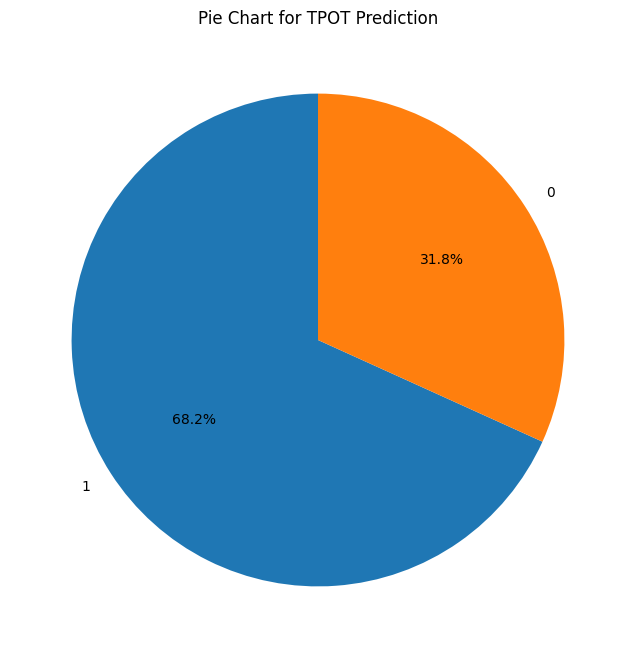

In [99]:
# Counts
tpot_pred_count = pd.Series(tpot_predictions).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(tpot_pred_count, labels=tpot_pred_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for TPOT Prediction')

### PyTorch Model Testing

In [78]:
# Predict & Test
y_torch_pred = 0
model.eval()

with torch.no_grad():
    output = model(X_test_tensor)
    n, pred = torch.max(output, 1)

    y_torch_pred = pred.numpy()

In [100]:
# Performance
pytorch_acc = accuracy_score(y_test, y_torch_pred)
pytorch_report = classification_report(y_test, y_torch_pred)

print(f'\nPyTorch Model Accuracy: {pytorch_acc}')
print(f'PyTorch Model Performance:\n{pytorch_report}')


PyTorch Model Accuracy: 0.890625
PyTorch Model Performance:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        67
           1       0.89      0.94      0.92       125

    accuracy                           0.89       192
   macro avg       0.89      0.87      0.88       192
weighted avg       0.89      0.89      0.89       192



Text(0.5, 1.0, 'Pie Chart for PyTorch Prediction')

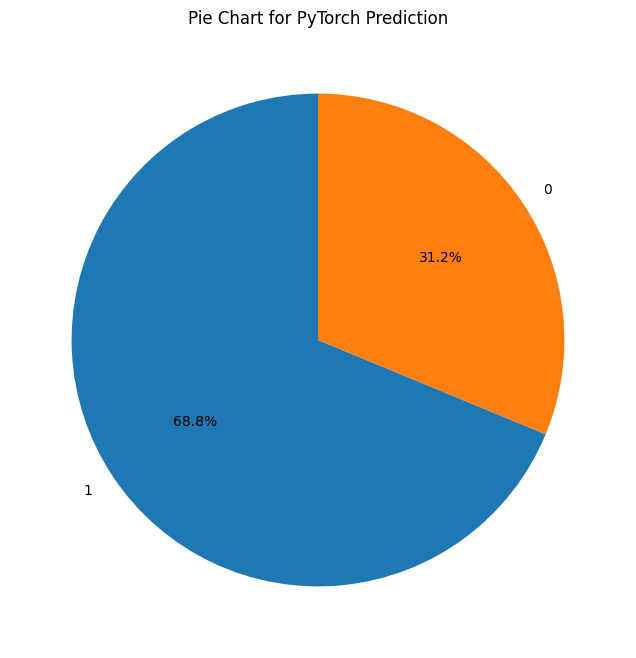

In [118]:
# Counts
pytorch_pred_count = pd.Series(y_torch_pred).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pytorch_pred_count, labels=pytorch_pred_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for PyTorch Prediction')

# Result & Evaluation
Dari hasil evaluasi model yang dijelaskan, dapat disimpulkan bahwa model yang dihasilkan oleh TPOT menunjukkan performa yang lebih unggul dibandingkan dengan model PyTorch. Model TPOT menonjol dengan akurasi tinggi dan nilai f1-score yang mengesankan, terutama dalam mengklasifikasikan kelas 0 dan 1. Presisi dan recall yang baik dari model TPOT menandakan kemampuannya dalam memberikan prediksi yang konsisten dan akurat. Di sisi lain, meskipun model PyTorch memberikan hasil yang baik, terutama dalam hal recall untuk kelas 1, performa secara keseluruhan tidak sebaik model TPOT. Oleh karena itu, dalam konteks uji klasifikasi yang dilakukan, model yang dihasilkan oleh TPOT dapat dianggap lebih baik. 